In [11]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torch.utils.data import DataLoader, default_collate
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
name = 'fashion_mnist'
x,y = 'image','label'
dsr = load_dataset(name)

In [7]:
def transform(b):
    b[x] = [TF.to_tensor(ele) for ele in b[x]]
    return b

def collate_fn(b):
    clt = default_collate(b)
    return (clt[x], clt[y])

class DataLoaders:
    def __init__(self, train_ds, val_ds, bs, collate_fn):
        self.train = DataLoader(train_ds, batch_size=bs, shuffle=True, collate_fn=collate_fn)
        self.valid = DataLoader(train_ds, batch_size=bs*2, shuffle=False, collate_fn=collate_fn)

In [8]:
bs = 1024
dst = dsr.with_transform(transform)
dls = DataLoaders(dst['train'], dst['test'], bs=bs, collate_fn=collate_fn)

In [10]:
xb,yb = next(iter(dls.train))
xb.shape,yb.shape,xb.min(),xb.max()

(torch.Size([1024, 1, 28, 28]), torch.Size([1024]), tensor(0.), tensor(1.))

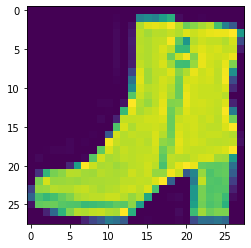

In [12]:
plt.imshow(xb[0].permute(1,2,0))